In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
from functions import *

In [82]:
dat = pd.read_csv("D:/Python_projects/python_datascience/epidemic/EMA/data/jj_21.csv")
dat["Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]= "J&J"

dat1 = pd.read_csv("D:/Python_projects/python_datascience/epidemic/EMA/data/pfizer_21.csv")
dat1["Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]= "PFIZER"

dat2 = pd.read_csv("D:/Python_projects/python_datascience/epidemic/EMA/data/astra_21.csv")
dat2["Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]= "ASTRA SE NECA"

dat3 = pd.read_csv("D:/Python_projects/python_datascience/epidemic/EMA/data/moderna_21.csv")
dat3["Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]= "MODERNA"

dat= pd.concat([dat,dat1,dat2,dat3])
dat["EV Gateway Receipt Date"] = pd.to_datetime(dat["EV Gateway Receipt Date"],format='%Y-%m-%d')
#dat=dat.set_index("EV Gateway Receipt Date")
dat["num"]=1
dat.head()

,﻿EU Local Number,Report Type,EV Gateway Receipt Date,Primary Source Qualification,Primary Source Country for Regulatory Purposes,Literature Reference,Patient Age Group,Patient Age Group (as per reporter),Parent Child Report,Patient Sex,Reaction List PT (Duration – Outcome - Seriousness Criteria),Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),Concomitant/Not Administered Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),ICSR Form,num
0,EU-EC-10008723600,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Male,"Ageusia (3d - Recovered/Resolved - ),<BR><BR>A...",J&J,[PARACETAMOL] (C - Premedication - n/a - [n/a ...,"<a target=""_blank"" href=""https://bi.ema.europa...",1
1,EU-EC-10008725968,Spontaneous,2021-05-21,Non Healthcare Professional,European Economic Area,Not available,65-85 Years,Not Specified,No,Female,"Chills (n/a - Recovered/Resolved - ),<BR><BR>P...",J&J,[ACETYLSALICYLIC ACID] (C - n/a - n/a - [n/a -...,"<a target=""_blank"" href=""https://bi.ema.europa...",1
2,EU-EC-10008726043,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Female,"Arthralgia (n/a - Recovering/Resolving - ),<BR...",J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1
3,EU-EC-10008726171,Spontaneous,2021-05-21,Non Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Female,Pain in extremity (n/a - Recovered/Resolved - ...,J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1
4,EU-EC-10008726191,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Male,Rash (n/a - Not Recovered/Not Resolved - ),J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1


In [83]:
int1=dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("Death",na=False)
int2=dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("Hospitalisation|Disabling|Death|Fatal",na=False)


In [84]:
#hospitalized
hosp_dat=dat[int2]
hosp_dat_sum=hosp_dat.groupby(["EV Gateway Receipt Date"]).agg("sum")

hosp_dat_sum["cum"]=getcumulatives(hosp_dat_sum)
hosp_dat_sum

,num,cum
EV Gateway Receipt Date,,
2021-01-01,3,1
2021-01-02,1,4
2021-01-04,19,23
2021-01-05,10,33
2021-01-06,7,40
...,...,...
2021-05-17,857,47405
2021-05-18,868,48273
2021-05-19,825,49098


In [85]:
#died
death_dat=dat[int1]
death_dat_sum=death_dat.groupby(["EV Gateway Receipt Date"]).agg("sum")

In [86]:
# all adverse effects
dat_sum=dat.groupby(["EV Gateway Receipt Date"]).agg("sum")

In [87]:
print(np.array(dat_sum["num"][0:1]),np.array(dat_sum["num"][0:1]).sum())

[24] 24


def smooth(series,num):
    interp=[]
    date=[]
    arr=np.array(series)
    ind=series.index
    N=num
    for  i,num in enumerate(arr):
        temp= arr[len(arr)-i-N:len(arr)-1-i]
        mu= temp.mean()
        interp.append(mu)
        if i==0:
            date.append(ind[len(ind)-1])
        else:
            date.append(ind[len(ind)-1-i])
    res = pd.DataFrame({"date":date,"mu":interp})
    return(res)

D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:66: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


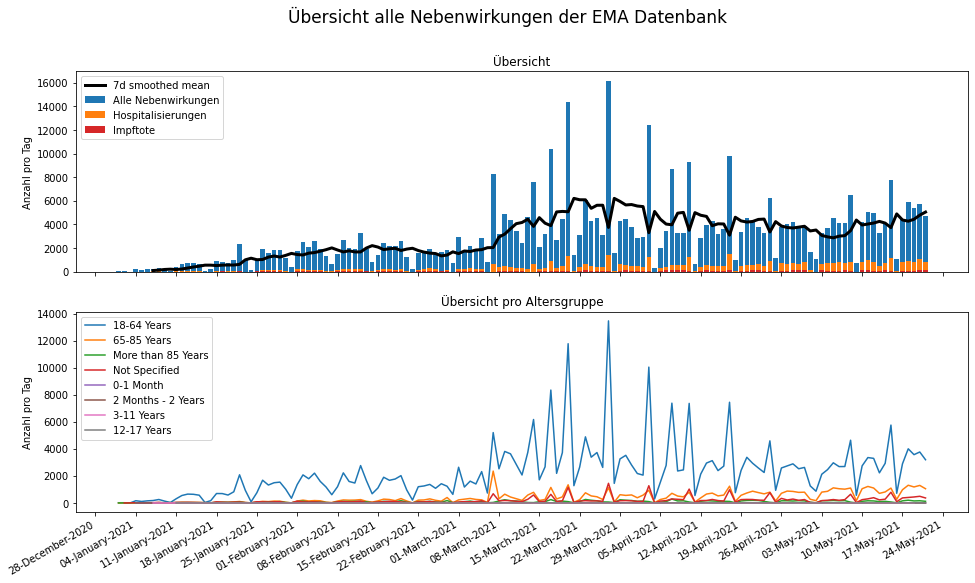

In [88]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(16,9),sharex=True)

fig.suptitle("Übersicht alle Nebenwirkungen der EMA Datenbank",fontsize=17)
sm=smooth(dat_sum["num"],7)
ax.set_title("Übersicht")
ax.set_ylabel("Anzahl pro Tag")
ax.bar(dat_sum.index,dat_sum["num"],label="Alle Nebenwirkungen",color="tab:blue")
ax.bar(hosp_dat_sum.index,hosp_dat_sum["num"],label="Hospitalisierungen",color="tab:orange")
ax.bar(death_dat_sum.index,death_dat_sum["num"],label="Impftote",color="tab:red")
ax.plot(sm["date"],sm["mu"],color="black",label="7d smoothed mean",linewidth=3)
ax.legend(loc="upper left")

age_dat=dat.groupby(["EV Gateway Receipt Date","Patient Age Group"]).agg("sum").reset_index().set_index("EV Gateway Receipt Date")
age_dat
age_groups=age_dat["Patient Age Group"].unique()

#plt.switch_backend("agg")
for i,group in enumerate(age_groups):
    tempo=age_dat[age_dat["Patient Age Group"] == group]
    ax1.plot(tempo.index,tempo["num"],label=group)
ax1.set_title("Übersicht pro Altersgruppe")
ax1.set_ylabel("Anzahl pro Tag")
ax1.legend(loc="upper left")
##### cumulatives
# cumsum = getcumulatives(dat_sum)
# cumsumhosp = getcumulatives(hosp_dat_sum)
# cumsumdeath = getcumulatives(death_dat_sum)


# ax2.set_title("kumulativ")
# ax2.set_ylabel("Hospitalisierungen und Tote kumulativ")

# ax2.plot(dat_sum.index,(cumsum/max(cumsum))*(max(cumsumhosp)*2),color="tab:blue",label="alle Nebenwirkungen")
# ax2.scatter(dat_sum.index[-1],[(cumsum/max(cumsum))*(max(cumsumhosp)*2)][0][-1],color="tab:blue",linewidth=3)
# ax2.text(dat_sum.index[-1],[(cumsum/max(cumsum))*(max(cumsumhosp)*2)][0][-1]-max(cumsumhosp)*0.1,
#            str(round(cumsum[-1])),fontweight="bold")

# ax2.plot(hosp_dat_sum.index,cumsumhosp,color="tab:orange",label="Hospitalisierungen")
# ax2.scatter(hosp_dat_sum.index[-1],cumsumhosp[-1],color="tab:orange",linewidth=3)
# ax2.text(hosp_dat_sum.index[-1],cumsumhosp[-1]+max(cumsumhosp)*0.1,
#            str(round(cumsumhosp[-1])),fontweight="bold")

# ax2.plot(death_dat_sum.index,cumsumdeath,color="tab:red",label="Impftote")
# ax2.scatter(death_dat_sum.index[-1],cumsumdeath[-1],color="tab:red",linewidth=3)
# ax2.text(death_dat_sum.index[-1],cumsumdeath[-1]+max(cumsumhosp)*0.1,
#            str(round(cumsumdeath[-1])),fontweight="bold",va='bottom',ha="center")
# ax2.legend(loc="upper left")
# # secondary axis conversion factor
# ratio=((max(cumsum))/(max(cumsumhosp)*2))

# #define function and inverse function
# secax_y = ax2.secondary_yaxis(
#     'right', functions=(lambda x: x*ratio, lambda x: x/ratio))

# secax_y.set_ylabel('Alle Nebenwirkungen kumulativ',color="tab:blue")
# secax_y.tick_params(axis='y', colors='tab:blue')

import matplotlib.dates as mdates
# set monthly locator
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
# set formatter
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%B-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

fig.show()
fig.savefig("img/overall_1.svg",format="svg", dpi=1200)


# data only from EEA countries

In [89]:
dat= dat[dat['Primary Source Country for Regulatory Purposes'].str.contains("European Economic Area",na=False)]
int1=dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("Death",na=False)
int2=dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("Hospitalisation|Disabling|Death|Fatal",na=False)
# all adverse effects
dat_sum=dat.groupby(["EV Gateway Receipt Date"]).agg("sum")
#hospitalized
hosp_dat=dat[int2]
hosp_dat_sum=hosp_dat.groupby(["EV Gateway Receipt Date"]).agg("sum")
hosp_dat_sum.head()
#died
death_dat=dat[int1]
death_dat_sum=death_dat.groupby(["EV Gateway Receipt Date"]).agg("sum")

In [90]:
dat

,﻿EU Local Number,Report Type,EV Gateway Receipt Date,Primary Source Qualification,Primary Source Country for Regulatory Purposes,Literature Reference,Patient Age Group,Patient Age Group (as per reporter),Parent Child Report,Patient Sex,Reaction List PT (Duration – Outcome - Seriousness Criteria),Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),Concomitant/Not Administered Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),ICSR Form,num
0,EU-EC-10008723600,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Male,"Ageusia (3d - Recovered/Resolved - ),<BR><BR>A...",J&J,[PARACETAMOL] (C - Premedication - n/a - [n/a ...,"<a target=""_blank"" href=""https://bi.ema.europa...",1
1,EU-EC-10008725968,Spontaneous,2021-05-21,Non Healthcare Professional,European Economic Area,Not available,65-85 Years,Not Specified,No,Female,"Chills (n/a - Recovered/Resolved - ),<BR><BR>P...",J&J,[ACETYLSALICYLIC ACID] (C - n/a - n/a - [n/a -...,"<a target=""_blank"" href=""https://bi.ema.europa...",1
2,EU-EC-10008726043,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Female,"Arthralgia (n/a - Recovering/Resolving - ),<BR...",J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1
3,EU-EC-10008726171,Spontaneous,2021-05-21,Non Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Female,Pain in extremity (n/a - Recovered/Resolved - ...,J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1
4,EU-EC-10008726191,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Male,Rash (n/a - Not Recovered/Not Resolved - ),J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29611,EU-EC-10007328533,Spontaneous,2021-01-11,Healthcare Professional,Non European Economic Area,Not available,18-64 Years,Not Specified,No,Female,Anaphylactic reaction (n/a - Unknown - Other M...,MODERNA,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1
29612,EU-EC-10007328534,Spontaneous,2021-01-11,Healthcare Professional,Non European Economic Area,Not available,18-64 Years,Not Specified,No,Male,Abdominal discomfort (n/a - Recovered/Resolved...,MODERNA,"[DESVENLAFAXINE, DESVENLAFAXINE SUCCINATE MONO...","<a target=""_blank"" href=""https://bi.ema.europa...",1
29613,EU-EC-10007328536,Spontaneous,2021-01-11,Healthcare Professional,Non European Economic Area,Not available,18-64 Years,Not Specified,No,Female,Anaphylactic reaction (1d - Recovered/Resolved...,MODERNA,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1
29614,EU-EC-10007330615,Spontaneous,2021-01-11,Non Healthcare Professional,Non European Economic Area,Not available,18-64 Years,Not Specified,No,Female,"Headache (n/a - Unknown - ),<BR><BR>Injection ...",MODERNA,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",1


# vaxx by manufacturer, OWID EEA, only EMA database vaccines

In [91]:
data_vaxx = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv")

EEA = ["Italy,Netherlands,France,Spain,Germany,Austria,Portugal,Denmark,Norway,Sweden,Belgium,United Kingdom,Ireland,Czech Republic,Greece,Romania,Finland,Luxembourg,Hungary,Croatia,Poland,Estonia,Lithuania,Slovakia,Latvia,Slovenia,Bulgaria,Iceland,Cyprus,Malta"]#######
EEA=EEA[0].split(",")
EEA="|".join(EEA)

v=["John","Pfizer","Astra","Modern"]
v="|".join(v)

data_vaxx=data_vaxx[data_vaxx["location"].str.contains(EEA,na=False)]
data_vaxx=data_vaxx[data_vaxx["vaccine"].str.contains(v,na=False)]

data_vaxx = data_vaxx.groupby(["date","vaccine"]).agg("sum").reset_index()
data_vaxx.rename(columns = {"total_vaccinations": "new_vaccinations"}, inplace=True)

data_vaxx["date"] = pd.to_datetime(data_vaxx["date"],format='%Y-%m-%d')
data_vaxx

,date,vaccine,new_vaccinations
0,2020-12-27,Johnson&Johnson,0
1,2020-12-27,Moderna,1
2,2020-12-27,Oxford/AstraZeneca,0
3,2020-12-27,Pfizer/BioNTech,34707
4,2020-12-28,Johnson&Johnson,0
...,...,...,...
583,2021-05-21,Pfizer/BioNTech,84947095
584,2021-05-22,Johnson&Johnson,453854
585,2021-05-22,Moderna,3433547
586,2021-05-22,Oxford/AstraZeneca,7608009


In [92]:
#by date not vaccine
data_vaxx_sum = data_vaxx.groupby(["date"]).agg("sum").reset_index()
data_vaxx_sum["date"] = pd.to_datetime(data_vaxx_sum["date"],format='%Y-%m-%d')
data_vaxx_sum = data_vaxx_sum.set_index("date")
data_vaxx_sum_diff=data_vaxx_sum.diff()
data_vaxx_sum_diff["new_vaccinations"][0] =data_vaxx_sum["new_vaccinations"][0]
#start from 2021
#data_vaxx_sum_diff==data_vaxx_sum_diff[data_vaxx_sum_diff.loc[:,"date"].str.contains("2021")]
data_vaxx_sum_diff

,new_vaccinations
date,
2020-12-27,34708.0
2020-12-28,24510.0
2020-12-29,59022.0
2020-12-30,75480.0
2020-12-31,78140.0
...,...
2021-05-18,2062915.0
2021-05-19,2305579.0
2021-05-20,2247653.0


In [93]:
data_vaxx_sum_diff["new_vaccinations"].max()

2692352.0

# data from owid, EEA countries

In [94]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
cols = ["date","continent","location","new_cases_smoothed",'population','new_deaths_smoothed', 'new_tests_smoothed',"new_vaccinations"]
data = data[cols]
dat_owid=data[data['location'].str.contains(EEA,na=False)]
dat_owid=dat_owid[dat_owid.loc[:,"date"].str.contains("2021")]
dat_owid["date"] = pd.to_datetime(dat_owid["date"],format='%Y-%m-%d')

In [95]:

# sums per date
dat_owid_sums=dat_owid.groupby(["date"]).agg("sum")
dat_owid_sums

,new_cases_smoothed,population,new_deaths_smoothed,new_tests_smoothed,new_vaccinations
date,,,,,
2021-01-01,154114.715,510149313.0,3454.285,1451155.0,34143.0
2021-01-02,158005.860,510149313.0,3493.000,1466810.0,102370.0
2021-01-03,163284.286,510149313.0,3498.715,1471826.0,67075.0
2021-01-04,168144.432,510149313.0,3516.141,1511727.0,186397.0
2021-01-05,173040.427,510149313.0,3555.284,1553119.0,312838.0
...,...,...,...,...,...
2021-05-18,58841.999,510149313.0,1195.575,1570741.0,3967914.0
2021-05-19,57679.858,510149313.0,1169.143,1564040.0,4326594.0
2021-05-20,53890.712,510149313.0,1091.572,711327.0,4347078.0


In [96]:
data_vaxx_sum["new_vaccinations"]

date
2020-12-27        34708
2020-12-28        59218
2020-12-29       118240
2020-12-30       193720
2020-12-31       271860
                ...    
2021-05-18    109390268
2021-05-19    111695847
2021-05-20    113943500
2021-05-21    115816709
2021-05-22     39810165
Name: new_vaccinations, Length: 147, dtype: int64

In [97]:
data_vaxx_sum[data_vaxx_sum.index == dat_sum.index[-1]]["new_vaccinations"][0]

115816709

D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.

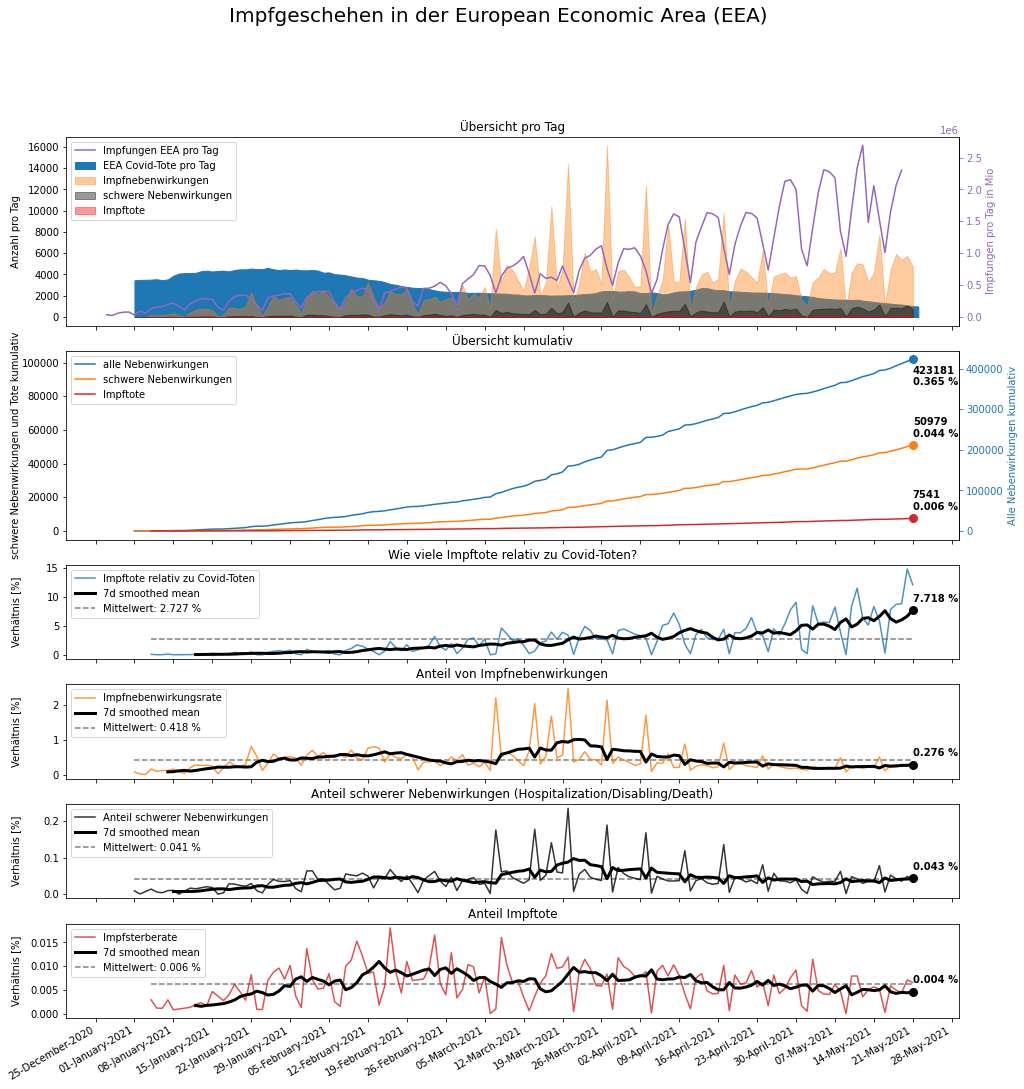

In [98]:
plt.switch_backend("agg")

#box = dict(facecolor='white', pad=5, alpha=0.2) # bos
labelx = -0.05  # axes coords
fig, ax = plt.subplots(6, 1,figsize=(16,18),sharex=True, 
                       gridspec_kw={
                           #'width_ratios': [2, 1],
                           'height_ratios': [2,2, 1,1,1,1]})

fig.suptitle("Impfgeschehen in der European Economic Area (EEA)",fontsize=20)
##################
ax[0].set_title("Übersicht pro Tag")
ax[0].fill_between(dat_owid_sums.index,dat_owid_sums["new_deaths_smoothed"],
                   label="EEA Covid-Tote pro Tag",color="tab:blue")
ax[0].fill_between(dat_sum.index,dat_sum["num"],
                   label="Impfnebenwirkungen",alpha=0.4,color="tab:orange")
ax[0].fill_between(hosp_dat_sum.index,hosp_dat_sum["num"],
                   label="schwere Nebenwirkungen",alpha=0.4,color="black")
ax[0].fill_between(death_dat_sum.index,death_dat_sum["num"],
                   label="Impftote",color="red",alpha=0.4)
ax[0].set_ylabel('Anzahl pro Tag')
ax[0].yaxis.set_label_coords(labelx, 0.5)
ax[0].plot(data_vaxx_sum_diff.index[0:len(data_vaxx_sum_diff.index)-3],
           (data_vaxx_sum_diff["new_vaccinations"][0:len(data_vaxx_sum_diff.index)-3]/data_vaxx_sum_diff["new_vaccinations"].max())*dat_sum["num"].max(),#########
           color="tab:purple",label="Impfungen EEA pro Tag")

# secondary axis conversion factor
ratio=data_vaxx_sum_diff["new_vaccinations"].max()/dat_sum["num"].max()

#define function and inverse function
secax_y = ax[0].secondary_yaxis(
    'right', functions=(lambda x: x*ratio, lambda x: x/ratio))

secax_y.set_ylabel('Impfungen pro Tag in Mio',color="tab:purple")
secax_y.tick_params(axis='y', colors='tab:purple')
ax[0].legend(loc="upper left")
#################### kumulatives
cumsum = getcumulatives(dat_sum)
cumsumhosp = getcumulatives(hosp_dat_sum)
cumsumdeath = getcumulatives(death_dat_sum)

# sideeffect rates
vac_total=data_vaxx_sum[data_vaxx_sum.index == dat_sum.index[-1]]["new_vaccinations"][0]
total_rate=(cumsum[-1]/vac_total)*100
hosp_rate=(cumsumhosp[-1]/vac_total)*100
death_rate=(cumsumdeath[-1]/vac_total)*100

ax[1].set_title("Übersicht kumulativ")
ax[1].set_ylabel("schwere Nebenwirkungen und Tote kumulativ")

ax[1].plot(dat_sum.index,(cumsum/max(cumsum))*(max(cumsumhosp)*2),color="tab:blue",label="alle Nebenwirkungen")
ax[1].scatter(dat_sum.index[-1],[(cumsum/max(cumsum))*(max(cumsumhosp)*2)][0][-1],color="tab:blue",linewidth=3)
ax[1].text(dat_sum.index[-1],[(cumsum/max(cumsum))*(max(cumsumhosp)*2)][0][-1]-max(cumsumhosp)*0.3,
           str(round(cumsum[-1]))+"\n"+str(total_rate)[0:5]+" %",fontweight="bold")

ax[1].plot(hosp_dat_sum.index,cumsumhosp,color="tab:orange",label="schwere Nebenwirkungen")
ax[1].scatter(hosp_dat_sum.index[-1],cumsumhosp[-1],color="tab:orange",linewidth=3)
ax[1].text(hosp_dat_sum.index[-1],cumsumhosp[-1]+max(cumsumhosp)*0.1,
           str(round(cumsumhosp[-1]))+"\n"+str(hosp_rate)[0:5]+" %",fontweight="bold")

ax[1].plot(death_dat_sum.index,cumsumdeath,color="tab:red",label="Impftote")
ax[1].scatter(death_dat_sum.index[-1],cumsumdeath[-1],color="tab:red",linewidth=3)
ax[1].text(death_dat_sum.index[-1],cumsumdeath[-1]+max(cumsumhosp)*0.1,
           str(round(cumsumdeath[-1]))+"\n"+str(death_rate)[0:5]+" %",
           fontweight="bold")#,va='bottom',ha="center"

ax[1].yaxis.set_label_coords(labelx, 0.5)
ax[1].legend(loc="upper left")
# secondary axis conversion factor
ratio1=((max(cumsum))/(max(cumsumhosp)*2))

#define function and inverse function
secax_y1 = ax[1].secondary_yaxis(
    'right', functions=(lambda x: x*ratio1, lambda x: x/ratio1))

secax_y1.set_ylabel('Alle Nebenwirkungen kumulativ',color="tab:blue")
secax_y1.tick_params(axis='y', colors='tab:blue')


#new deaths in range of available data (new deaths owid)
new_deaths = []
for i,date in enumerate(death_dat_sum.index):
    new_deaths.append(dat_owid_sums[dat_owid_sums.index==str(date)[0:10]].loc[:,"new_deaths_smoothed"][0])

#death rate from available data
DR = (death_dat_sum["num"]/new_deaths)*100
DR_mu=DR.mean()
ax[2].set_title("Wie viele Impftote relativ zu Covid-Toten?")
ax[2].hlines(DR_mu,death_dat_sum.index[0],death_dat_sum.index[-1],color="grey",linestyle="dashed",
             label="Mittelwert: "+str(DR_mu)[0:5]+" %")
ax[2].plot(death_dat_sum.index,DR,label="Impftote relativ zu Covid-Toten",
           color="tab:blue",alpha=0.8)
sm=smooth(DR,7)
ax[2].plot(sm["date"],sm["mu"],color="black",label="7d smoothed mean",linewidth=3)
ax[2].text(sm["date"][0],sm["mu"][0]+DR.max()*0.1,
           str(sm["mu"][0])[0:5]+ " %",fontweight="bold")
ax[2].scatter(sm["date"][0],sm["mu"][0],color="black",linewidth=3)
ax[2].set_ylabel('Verhältnis [%]')
ax[2].yaxis.set_label_coords(labelx, 0.5)
ax[2].legend()
##################
#new adverse effects in range of available data
new_vaxxs_ = []
for i,date in enumerate(dat_sum.index):
    new_vaxxs_.append(data_vaxx_sum_diff[data_vaxx_sum_diff.index==str(date)[0:10]].loc[:,"new_vaccinations"][0])
#adverse effect ratio from available data (vaxxinations owid)
AER = (dat_sum["num"]/new_vaxxs_)*100
#mean ratio
AER_mu=AER.mean()
ax[3].set_title("Anteil von Impfnebenwirkungen")
ax[3].hlines(AER_mu,dat_sum.index[0],dat_sum.index[-1],color="grey",linestyle="dashed",
             label="Mittelwert: "+str(AER_mu)[0:5]+" %")
ax[3].plot(dat_sum.index,AER,label="Impfnebenwirkungsrate",color="tab:orange",alpha=0.8)
sm2=smooth(AER,7)
ax[3].plot(sm2["date"],sm2["mu"],color="black",label="7d smoothed mean",linewidth=3)
ax[3].text(sm2["date"][0],sm2["mu"][0]+AER.max()*0.1,
           str(sm2["mu"][0])[0:5]+ " %",fontweight="bold")
ax[3].scatter(sm2["date"][0],sm2["mu"][0],color="black",linewidth=3)
ax[3].set_ylabel('Verhältnis [%]')
ax[3].yaxis.set_label_coords(labelx, 0.5)
ax[3].legend(loc="upper left")
##############
#new hospitalizations in range of available data
new_vaxxs1 = []
for i,date in enumerate(hosp_dat_sum.index):
    new_vaxxs1.append(data_vaxx_sum_diff[data_vaxx_sum_diff.index==str(date)[0:10]].loc[:,"new_vaccinations"][0])

#hospitalization rate from available data (vaxxinations owid)
HR = (hosp_dat_sum["num"]/new_vaxxs1)*100

HR_mu=HR.mean()
ax[4].set_title("Anteil schwerer Nebenwirkungen (Hospitalization/Disabling/Death)")
ax[4].hlines(HR_mu,hosp_dat_sum.index[0],hosp_dat_sum.index[-1],color="grey",linestyle="dashed",
             label="Mittelwert: "+str(HR_mu)[0:5]+" %")
ax[4].plot(hosp_dat_sum.index,HR,label="Anteil schwerer Nebenwirkungen",color="black",alpha=0.8)
sm2=smooth(HR,7)
ax[4].plot(sm2["date"],sm2["mu"],color="black",label="7d smoothed mean",linewidth=3)
ax[4].text(sm2["date"][0],sm2["mu"][0]+HR.max()*0.1,
           str(sm2["mu"][0])[0:5]+ " %",fontweight="bold")
ax[4].scatter(sm2["date"][0],sm2["mu"][0],color="black",linewidth=3)
ax[4].set_ylabel('Verhältnis [%]')
ax[4].yaxis.set_label_coords(labelx, 0.5)
ax[4].legend(loc="upper left")
##############
#new deaths in range of available data
new_vaxxs = []
for i,date in enumerate(death_dat_sum.index):
    new_vaxxs.append(data_vaxx_sum_diff[data_vaxx_sum_diff.index==str(date)[0:10]].loc[:,"new_vaccinations"][0])

#death rate from available data (vaxxinations owid)
DR2 = (death_dat_sum["num"]/new_vaxxs)*100

DR2_mu=DR2.mean()
ax[5].set_title("Anteil Impftote")
ax[5].hlines(DR2_mu,death_dat_sum.index[0],death_dat_sum.index[-1],color="grey",linestyle="dashed",
             label="Mittelwert: "+str(DR2_mu)[0:5]+" %")
ax[5].plot(death_dat_sum.index,DR2,label="Impfsterberate",color="tab:red",alpha=0.8)
sm1=smooth(DR2,7)
ax[5].plot(sm1["date"],sm1["mu"],color="black",label="7d smoothed mean",linewidth=3)
ax[5].set_ylabel('Verhältnis [%]')
ax[5].yaxis.set_label_coords(labelx, 0.5)
ax[5].text(sm1["date"][0],sm1["mu"][0]+DR2.max()*0.1,
           str(sm1["mu"][0])[0:5]+ " %",fontweight="bold")
ax[5].scatter(sm1["date"][0],sm1["mu"][0],color="black",linewidth=3)

import matplotlib.dates as mdates
ax[5].xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax[5].xaxis.set_major_formatter(mdates.DateFormatter('%d-%B-%Y'))
plt.gcf().autofmt_xdate()

plt.legend(loc="upper left")#
fig.show()
fig.savefig("img/overall.svg",format="svg", dpi=1200)

# plots per vaccine

In [99]:
dat= dat[dat['Primary Source Country for Regulatory Purposes'].str.contains("European Economic Area",na=False)]
int11=dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("Death",na=False)
int22=dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("Hospitalisation|Disabling|Death|Fatal",na=False)
# all adverse effects
dat_sum=dat.groupby(["EV Gateway Receipt Date","Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]).agg("sum").reset_index().set_index("EV Gateway Receipt Date")
#hospitalized
hosp_dat=dat[int2]
hosp_dat_sum=hosp_dat.groupby(["EV Gateway Receipt Date","Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]).agg("sum").reset_index().set_index("EV Gateway Receipt Date")
hosp_dat_sum.head()
#died
death_dat=dat[int1]
death_dat_sum=death_dat.groupby(["EV Gateway Receipt Date","Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]).agg("sum").reset_index().set_index("EV Gateway Receipt Date")

In [100]:
hosp_dat_sum

,Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),num
EV Gateway Receipt Date,,
2021-01-01,PFIZER,3
2021-01-02,PFIZER,1
2021-01-04,PFIZER,19
2021-01-05,PFIZER,10
2021-01-06,PFIZER,7
...,...,...
2021-05-20,PFIZER,491
2021-05-21,ASTRA SE NECA,240
2021-05-21,J&J,30


In [101]:
pd.Series([1.3,2.4,3,4]).mean()

2.675

In [102]:
v=["John","Pfizer","Astra","Modern"]

C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


rate: 0.738
HR:                 rate
date                
2021-04-25  0.033856
2021-04-26  0.261952
2021-04-27  0.165506
2021-04-28  0.168421
2021-04-29  0.134675
2021-04-30  0.416920
2021-05-03  0.169155
2021-05-04  0.122249
2021-05-05  0.195487
2021-05-06  0.228508
2021-05-07  0.197347
2021-05-09  0.010478
2021-05-10  0.350780
2021-05-11  0.251494
2021-05-12  0.297575
2021-05-13  0.345485
2021-05-14  0.153107
2021-05-16  0.008892
2021-05-17  0.074131
2021-05-18  0.102123
2021-05-19  0.173653
2021-05-20  0.096468


D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  AER = [(dat_sum_temp[i]/new_vaxxs_[i])*100 for i in range(len(new_vaxxs_))]
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  AER = [(dat_sum_temp[i]/new_vaxxs_[i])*100

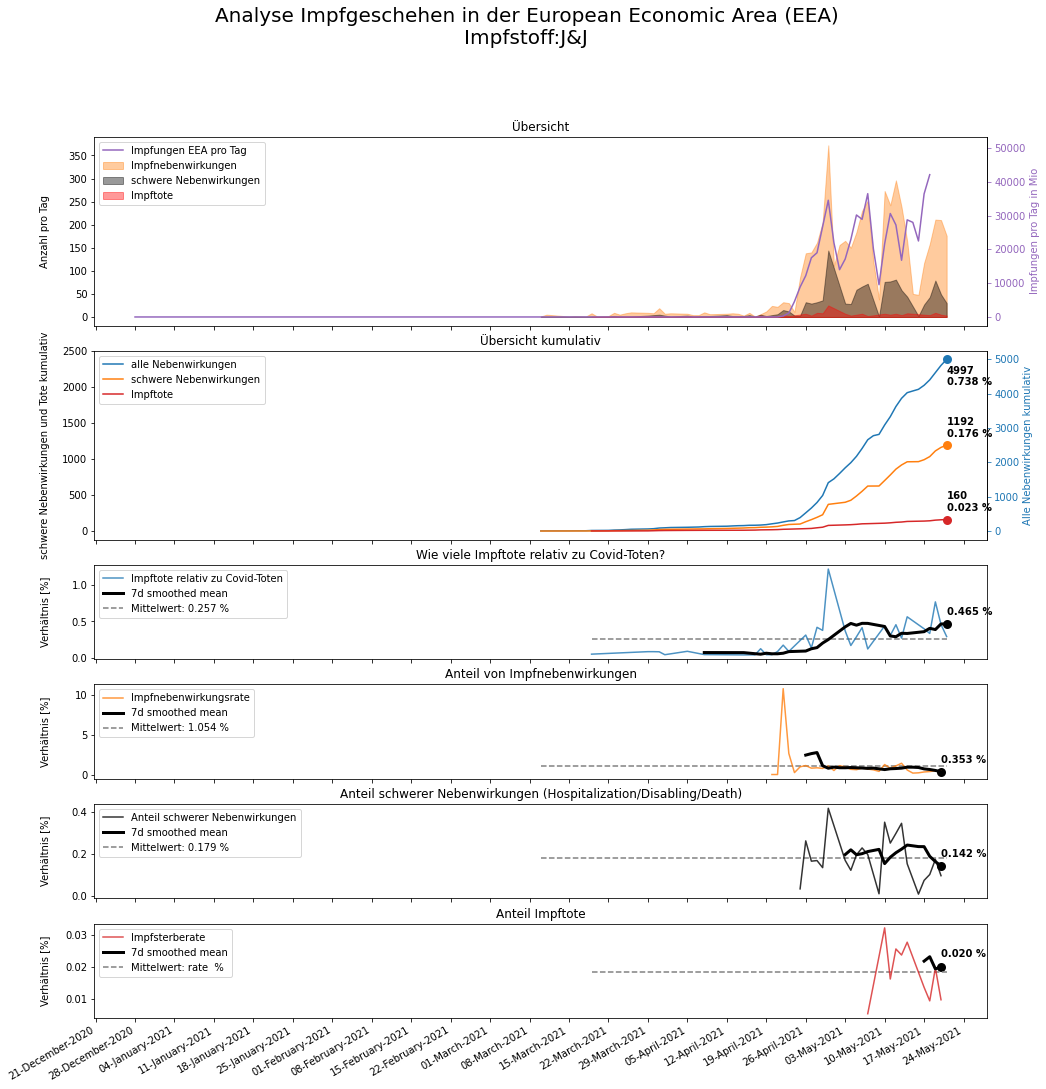

In [103]:
#jj
jj=data_vaxx[data_vaxx["vaccine"].str.contains(v[0],na=False)]
jj["total_vaccinations"]=jj["new_vaccinations"][0:len(jj)-1]
jj["new_vaccinations"]=jj["new_vaccinations"].diff()[0:len(jj)-1]

jj=jj.dropna().set_index("date")
#print(jj)
fig=plotbyvaccine(dat_owid_sums,dat_sum,hosp_dat_sum,death_dat_sum,jj,"J&J")
fig.savefig("img/jj.svg",format="svg", dpi=1200)

['John', 'Pfizer', 'Astra', 'Modern']


C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rate: 0.225


D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


HR:                 rate
date                
2021-01-01  0.009546
2021-01-02  0.001078
2021-01-04  0.014248
2021-01-05  0.006386
2021-01-06  0.004365
...              ...
2021-05-16  0.006117
2021-05-17  0.035323
2021-05-18  0.030270
2021-05-19  0.021675
2021-05-20  0.029587

[138 rows x 1 columns]


D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


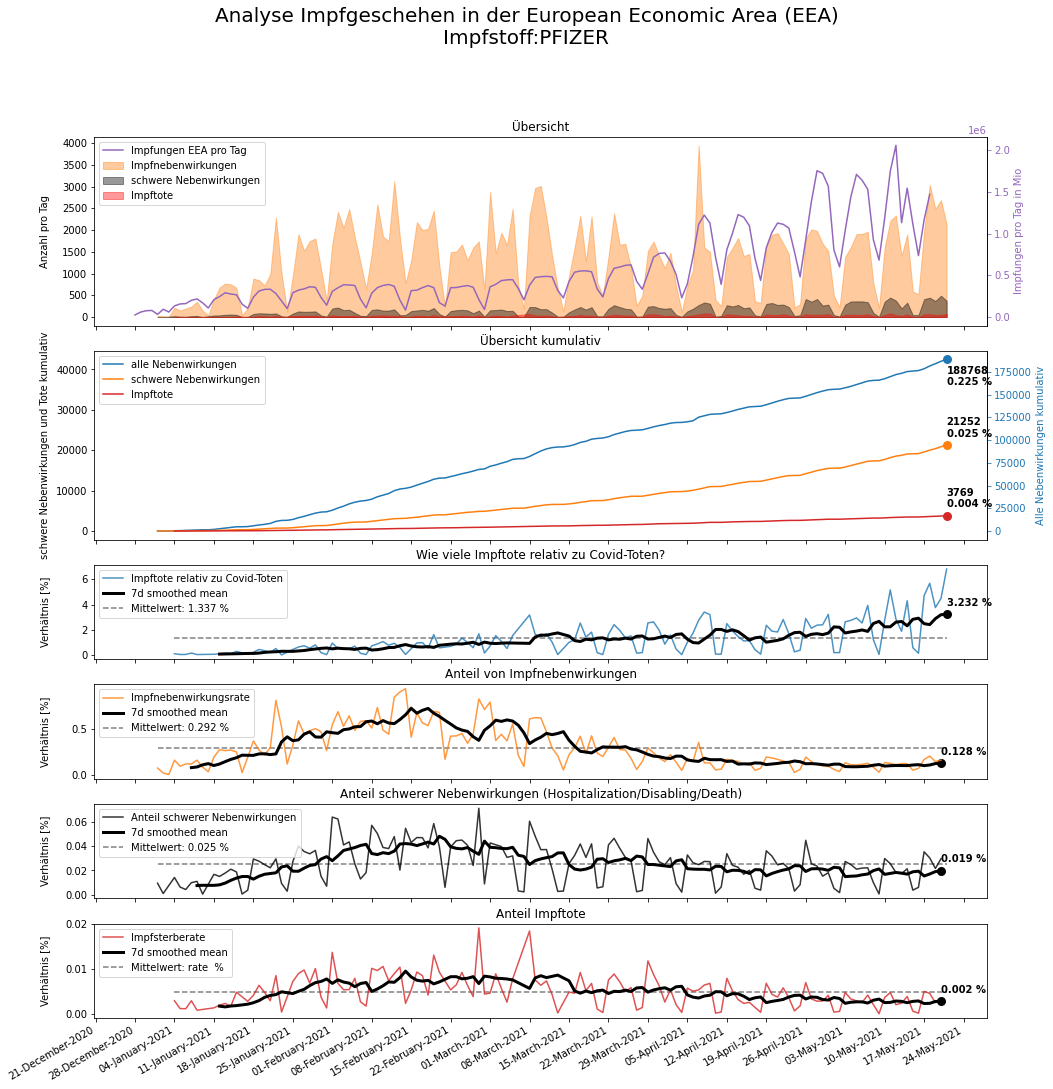

In [104]:
#Pfizer
print(v)
pf=data_vaxx[data_vaxx["vaccine"].str.contains(v[1],na=False)]
pf["total_vaccinations"]=pf["new_vaccinations"][0:len(pf)-1]
pf["new_vaccinations"]=pf["new_vaccinations"].diff()[0:len(pf)-1]
pf=pf.dropna().set_index("date")
pf
fig=plotbyvaccine(dat_owid_sums,dat_sum,hosp_dat_sum,death_dat_sum,pf,"PFIZER")
fig.savefig("img/pfizer.svg",format="svg", dpi=1200)

Astra
date
2020-12-29         0.0
2020-12-30         0.0
2020-12-31         0.0
2021-01-01         1.0
2021-01-02         0.0
                ...   
2021-04-02    194646.0
2021-04-03    140124.0
2021-04-04     99359.0
2021-04-05    136720.0
2021-04-06    217329.0
Name: new_vaccinations, Length: 99, dtype: float64
rate: 0.982


C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core

HR:                 rate
date                
2021-03-27  0.559417
2021-03-28  0.012290
2021-03-29  0.093820
2021-03-30  0.083391
2021-03-31  0.069821
2021-04-01  0.071020
2021-04-02  0.046238
2021-04-03  0.830693
2021-04-04  0.007045
2021-04-05  0.023406
2021-04-06  0.047854
2021-04-07  0.069692
2021-04-08  0.038226
2021-04-09  0.040179
2021-04-10  0.509046
2021-04-11  0.018867
2021-04-12  0.048269
2021-04-13  0.047733
2021-04-14  0.042426
2021-04-15  0.041312
2021-04-16  0.043289
2021-04-17  0.485248
2021-04-18  0.006997
2021-04-19  0.059953
2021-04-20  0.055882
2021-04-21  0.043453
2021-04-22  0.053630
2021-04-23  0.044363
2021-04-24  0.400705
2021-04-25  0.009911
2021-04-26  0.115783
2021-04-27  0.112709
2021-04-28  0.122497
2021-04-29  0.094304
2021-04-30  0.098893
2021-05-01  0.073244
2021-05-02  0.007943
2021-05-03  0.098106
2021-05-04  0.070565
2021-05-05  0.046669
2021-05-06  0.063483
2021-05-07  0.060193
2021-05-08  0.331742
2021-05-09  0.009253
2021-05-10  0.078242
2021-05-1

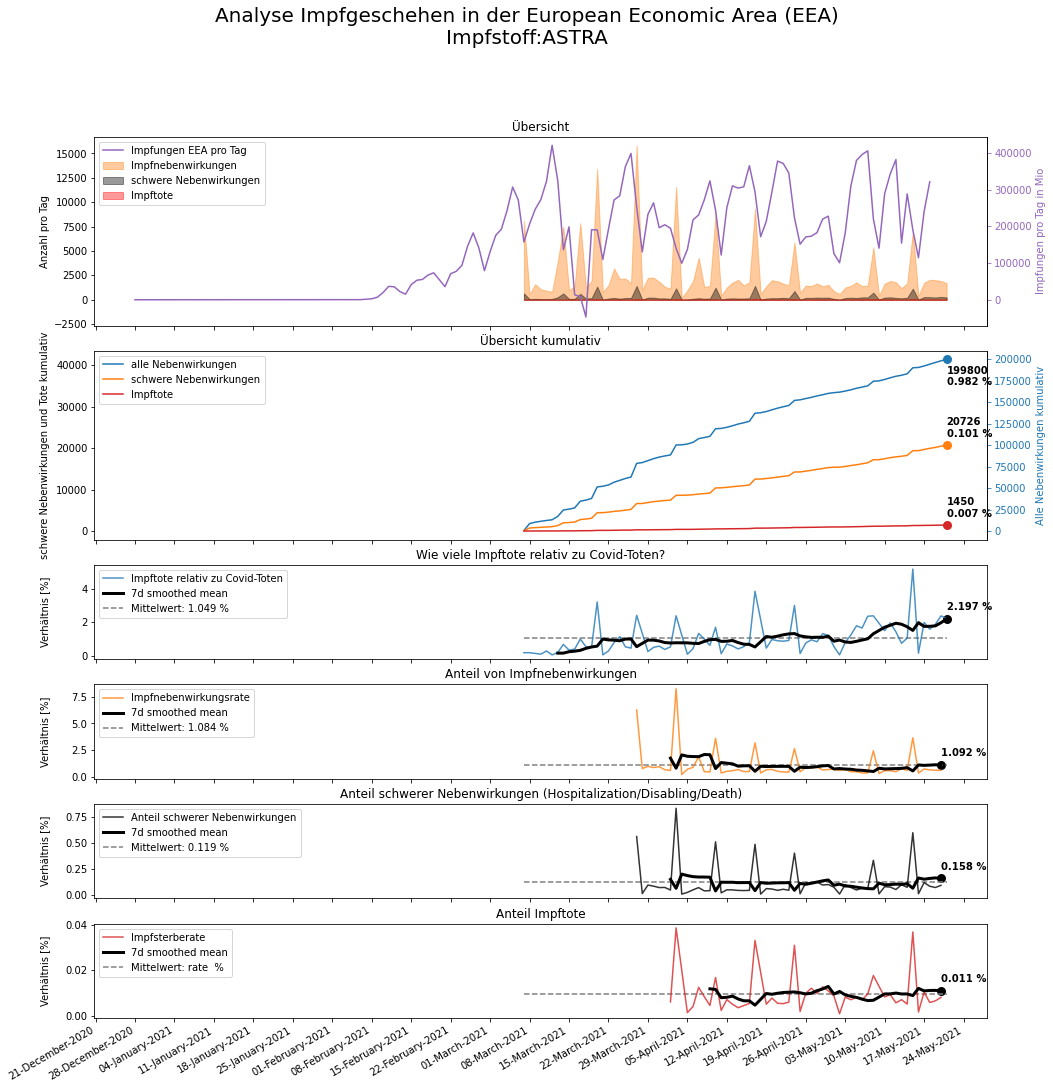

In [105]:
#ASTRA
print(v[2])
ast=data_vaxx[data_vaxx["vaccine"].str.contains(v[2],na=False)]
ast["total_vaccinations"]=ast["new_vaccinations"][0:len(ast)-1]
ast["new_vaccinations"]=ast["new_vaccinations"].diff()[0:len(ast)-1]
ast=ast.dropna().set_index("date")
print(ast["new_vaccinations"][1:100])
fig=plotbyvaccine(dat_owid_sums,dat_sum,hosp_dat_sum,death_dat_sum,ast,"ASTRA")
fig.savefig("img/astra.svg",format="svg", dpi=1200)

Modern


C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rate: 0.315
HR:                 rate
date                
2021-01-15  0.012308
2021-01-18  0.010224
2021-01-19  0.028206
2021-01-20  0.008934
2021-01-21  0.010553
...              ...
2021-05-16  0.004349
2021-05-17  0.066616
2021-05-18  0.050083
2021-05-19  0.062598
2021-05-20  0.118293

[114 rows x 1 columns]


D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.py:14: RuntimeWarning: Mean of empty slice.
  mu= temp.mean()
C:\Users\Icemeister\anaconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Python_projects\python_datascience\epidemic\EMA\functions.

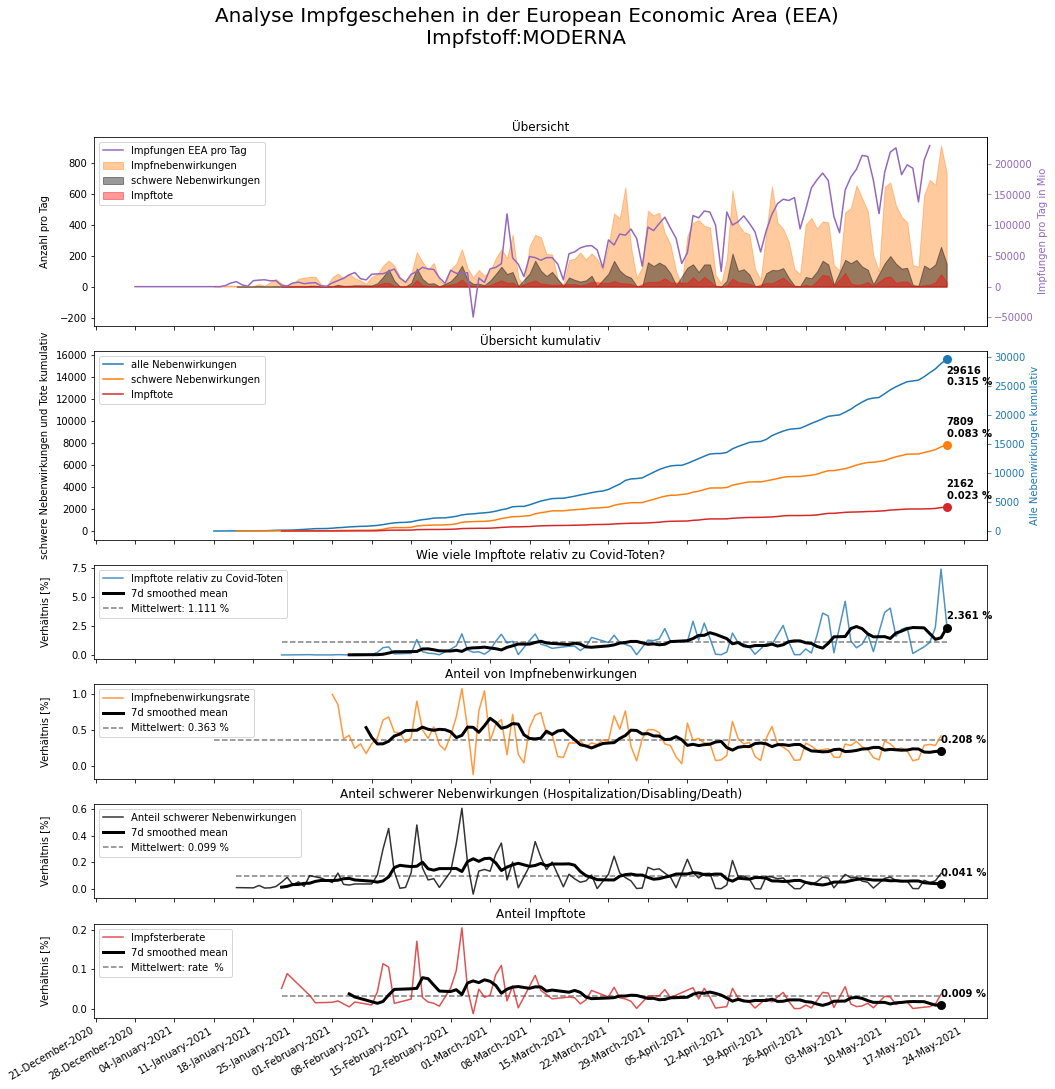

In [106]:
#Moderna
print(v[3])
mod=data_vaxx[data_vaxx["vaccine"].str.contains(v[3],na=False)]
mod["total_vaccinations"]=mod["new_vaccinations"][0:len(mod)-1]
mod["new_vaccinations"]=mod["new_vaccinations"].diff()[0:len(mod)-1]
mod=mod.dropna().set_index("date")
fig=plotbyvaccine(dat_owid_sums,dat_sum,hosp_dat_sum,death_dat_sum,mod,"MODERNA")
fig.savefig("img/moderna.svg",format="svg", dpi=1200)